<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-Albert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analyzing the performance of the Albert models using weightwatcher

ALBERT exhbits many features of the theory, including 
- the layer metrics are nearly all very well correlated with various NLP quality metrics
- layers with alpha ~ 2 can show theoretcially perfect behavior

but (or and) it has some of the common gotchas you have to watch out for
 - there are layers exhbiting  rank collapse
 - at least 1 layer (in xxlarge) has a bad Power lw fit, and needs to be corrected 

The 4 pretrained models are traken from the Huggingface Repo:

https://huggingface.co/albert-base-v2

<pre>
    V2	    Average	SQuAD1.1	SQuAD2.0	MNLI	SST-2	RACE					
ALBERT-base	   82.3	90.2/83.2	82.1/79.3	84.6	92.9	66.8
ALBERT-large	  85.7	91.8/85.2	84.9/81.8	86.5	94.9	75.2
ALBERT-xlarge	 87.9	92.9/86.4	87.9/84.1	87.9	95.4	80.7
ALBERT-xxlarge	90.9	94.6/89.1	89.8/86.9	90.6	96.8	86.8
</pre>

Each ALBERT model has the same number of layers

This lets us see how the invidual layer eigenvalues / spectral properties change with an increasingly complex model, trained with more data.



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from transformers import AutoModel


In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip install transformers weightwatcher gwpy matplotlib==3.1.3


In [3]:
import weightwatcher as ww
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__) 
logger.setLevel(logging.INFO)

print(ww.__version__)

0.6.3.3


In [4]:
layer_id = 26

Some weights of the model checkpoint at albert-xxlarge-v2 were not used when initializing AlbertModel: ['predictions.dense.bias', 'predictions.LayerNorm.bias', 'predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.dense.weight', 'predictions.bias', 'predictions.decoder.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Fixing fingers using  clip_xmax
INFO



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 


max N = 10
Calculating best minimal value for power law fit


Assuming nested distributions
INFO:weightwatcher:fit alpha 1.75 sigma 0.02 TPL or PL? 0.5521


Assuming nested distributions
INFO:weightwatcher:2 fit alpha 1.7629 sigma 0.0241 TPL or PL? 1.5622
INFO:weightwatcher:2 fit alpha 1.76 sigma 0.02 TPL or PL? 1.5622


stopping at min alpha = 1.76
checking alpha


INFO:weightwatcher:checking fit 3 xmax 177.3112  alpha 1.76 sigma 0.02


INFO:weightwatcher:checking fit 4 xmax 111.3506  alpha 1.76 sigma 0.02


INFO:weightwatcher:checking fit 5 xmax 79.7800  alpha 1.76 sigma 0.02


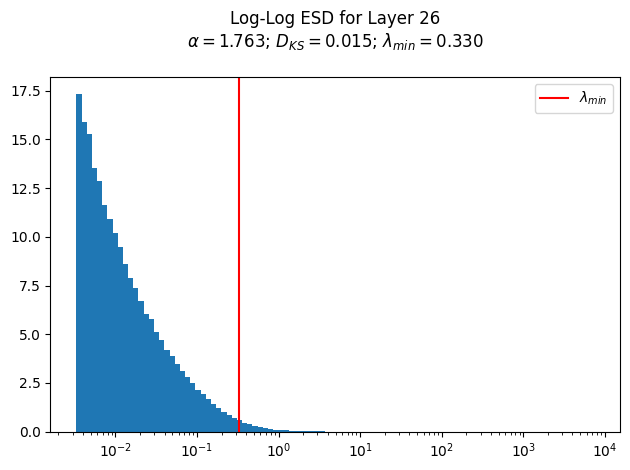

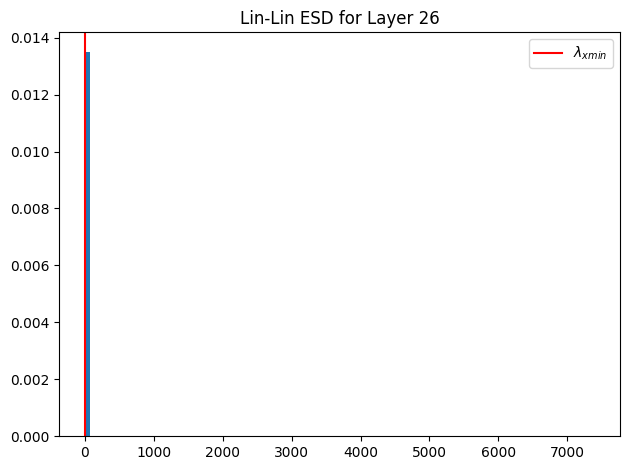

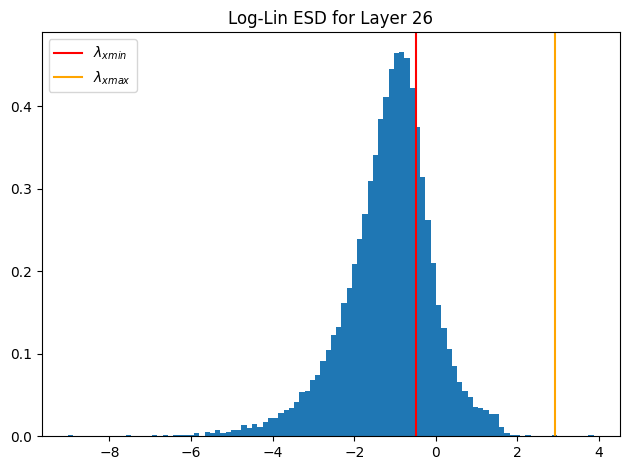

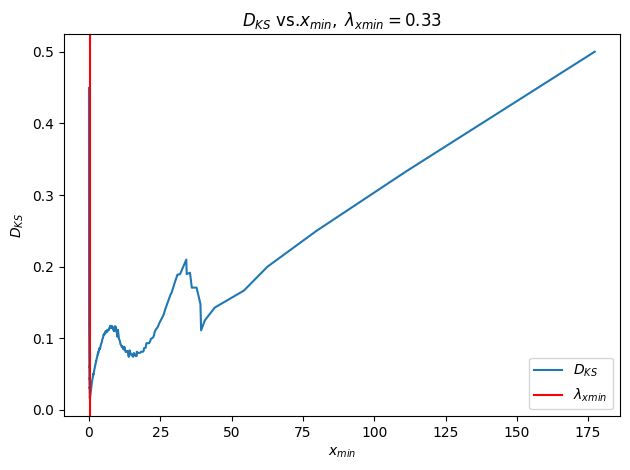

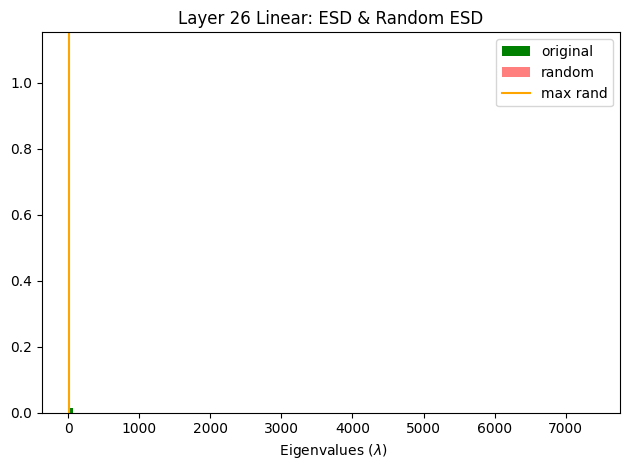

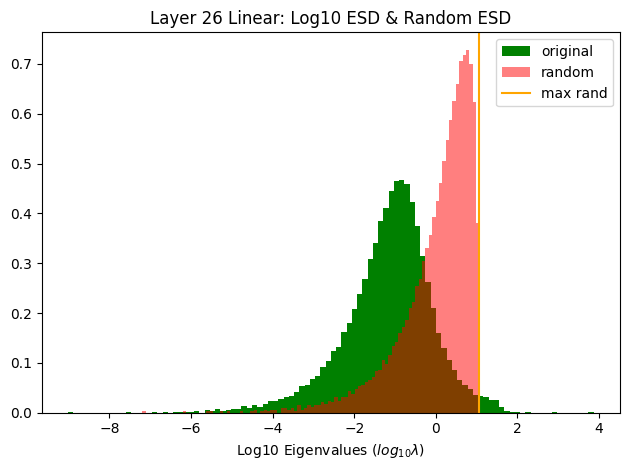

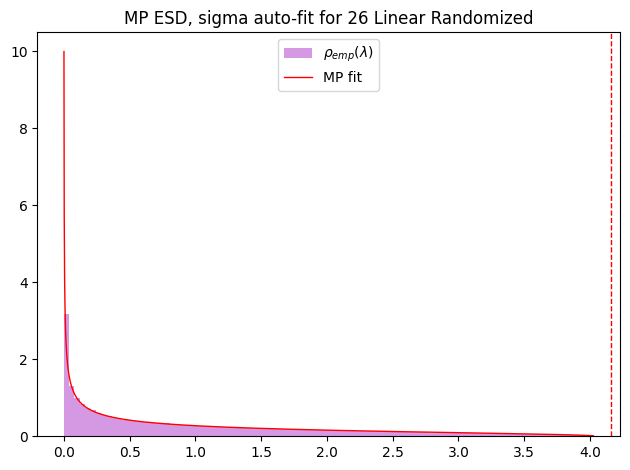

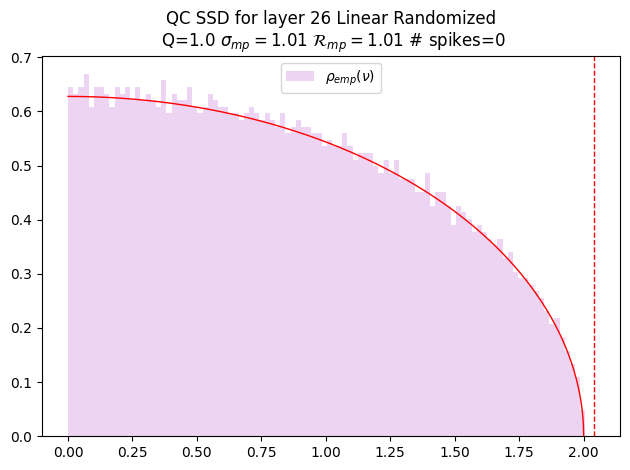

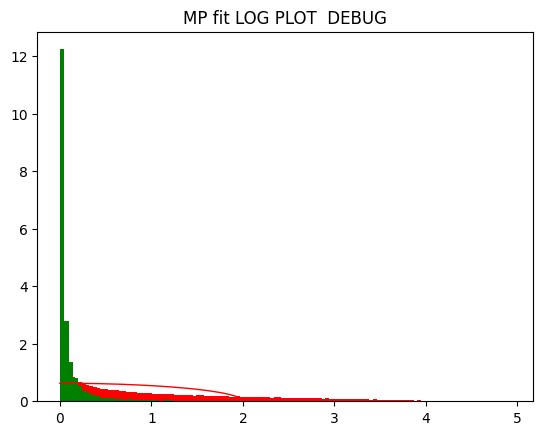

,layer_id,name,D,Lambda,M,N,Q,alpha,alpha_weighted,best_fit,...,sigma,spectral_norm,stable_rank,sv_max,warning,weak_rank_loss,ww_maxdist,ww_softrank,xmax,xmin
0,26,Linear,0.015352,-1.0,4096.0,4096.0,1.0,1.762901,6.82037,power_law,...,0.024101,7393.230881,1.60426,85.983899,over-trained,7.0,7381.647331,0.001567,839.468487,0.330324


In [38]:
from transformers import  AlbertModel

import warnings
warnings.filterwarnings('ignore')

model_name = f"albert-xxlarge-v2"
albert = AlbertModel.from_pretrained(model_name)

watcher = ww.WeightWatcher(model=albert)
details = watcher.analyze(layers=[layer_id], fix_fingers='clip_xmax', plot=True, randomize=True)
details

In [13]:
esd = watcher.get_ESD(layer=layer_id)

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'f

Text(0.5, 1.0, 'ALBERT xxlarge Layer {layer_id}')

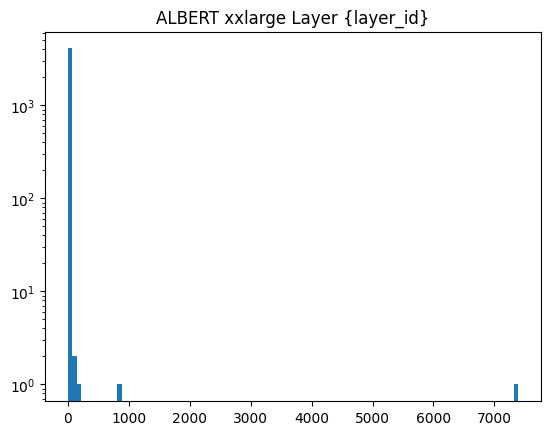

In [14]:
plt.hist(esd, bins=100, log=True);
plt.title("ALBERT xxlarge Layer {layer_id}")

In [29]:
def plot_loghist(x, bins=100, xmin=None):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, density=True)

    if xmin:
        plt.axvline(xmin, color='r', label=r'$\lambda_{min}$')

    plt.xscale('log')

In [30]:
import powerlaw

In [31]:
fit = powerlaw.Fit(esd[esd>1], xmax=esd[-2])

Calculating best minimal value for power law fit


Text(0.5, 1.0, 'ALBERT xxlarge Layer 26')

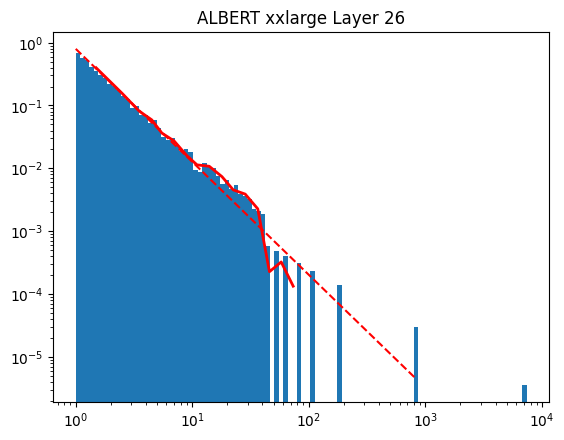

In [37]:
fig2 = fit.plot_pdf(color='b', linewidth=0) # invisbile
fig2 = fit.plot_pdf(color='r', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig2)
plot_loghist(esd[esd>1])
plt.title(f"ALBERT xxlarge Layer {layer_id}")

In [33]:
def plot_loghist(x, bins=100, xmin=None, density=True):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, density=density)

    if xmin:
        plt.axvline(xmin, color='r', label=r'$\lambda_{min}$')

    plt.xscale('log')

Text(0.5, 1.0, 'ALBERT xxlarge Layer 26')

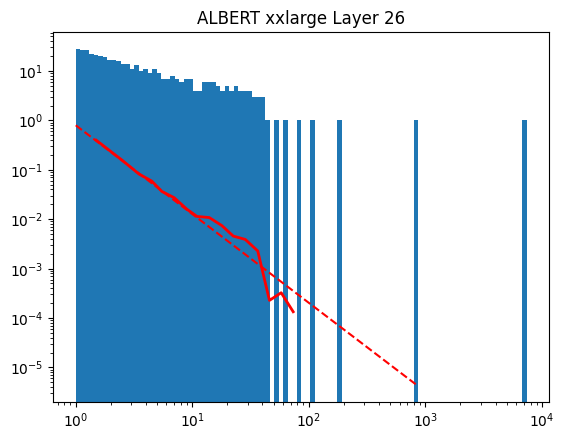

In [34]:
fig2 = fit.plot_pdf(color='b', linewidth=0) # invisbile
fig2 = fit.plot_pdf(color='r', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig2)
plot_loghist(esd[esd>1], density=False)
plt.title(f"ALBERT xxlarge Layer {layer_id}")